In [1]:
# Load dependencies
import pandas as pd,\
  linearmodels as lm,\
  statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data, remove rows with missing values, create a date type column
df = pd.read_csv("/Users/saejin123/Documents/DiD_data.csv")
#df.dropna(inplace=True)
df['date_parsed'] =  pd.to_datetime(df['rssd9999'], format='%Y%m%d')
# Add column for different periods
df['after_2007'] = 1
df.loc[df['date_parsed'] <= '2006-12-31','after_2007'] = 0

In [3]:
# Get average of mean trading ratio per bank BEFORE
df_bank_means_before= df[df['after_DFA_1']==0].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
df_bank_means_before.rename(columns={"bhc_avgtradingratio": "affect_before"}, inplace=True)
#df_bank_means_before['affect_after'] = df[df['after_DFA_1']==0].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
# Get average of mean trading ratio per bank AFTER
df_bank_means_after= df[df['after_DFA_1']==1].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
df_bank_means_after.rename(columns={"bhc_avgtradingratio": "affect_after"}, inplace=True)

# 2007
df_bank_means_before_2007= df[df['after_2007']==0].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
df_bank_means_before_2007.rename(columns={"bhc_avgtradingratio": "affect_before_2007"}, inplace=True)
#df_bank_means_before['affect_after'] = df[df['after_DFA_1']==0].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
# Get average of mean trading ratio per bank AFTER
df_bank_means_after_2007= df[df['after_2007']==1].groupby(['rssd9001'])['bhc_avgtradingratio'].mean().reset_index()
df_bank_means_after_2007.rename(columns={"bhc_avgtradingratio": "affect_after_2007"}, inplace=True)

In [4]:
# merge to the bank means before
df_combined = df_bank_means_before.merge(df_bank_means_after, on='rssd9001', how='inner')
df_combined_2007 = df_bank_means_before_2007.merge(df_bank_means_after_2007, on='rssd9001', how='inner')
df_combined_2007

,rssd9001,affect_before_2007,affect_after_2007
0,1020180,0.000000,0.000002
1,1020201,0.134151,NaN
2,1020340,0.008902,0.017922
3,1020395,0.000000,NaN
4,1020582,0.000000,NaN
...,...,...,...
2239,3447585,NaN,0.000545
2240,3449075,NaN,0.000000
2241,3449431,NaN,0.000000
2242,3485989,NaN,0.000000


In [5]:
df_combined['diff_of_trading_means'] = df_combined['affect_after'] - df_combined['affect_before']
df_combined_2007['diff_of_trading_means_2007'] = df_combined_2007['affect_after_2007'] - df_combined_2007['affect_before_2007']
df_combined_2007['affect_2007'] = 0
df_combined_2007.loc[df_combined_2007['affect_before_2007'] >= 0.03,'affect_2007'] = 1

In [6]:
df_combined_2007

,rssd9001,affect_before_2007,affect_after_2007,diff_of_trading_means_2007,affect_2007
0,1020180,0.000000,0.000002,0.000002,0
1,1020201,0.134151,NaN,NaN,1
2,1020340,0.008902,0.017922,0.009020,0
3,1020395,0.000000,NaN,NaN,0
4,1020582,0.000000,NaN,NaN,0
...,...,...,...,...,...
2239,3447585,NaN,0.000545,NaN,0
2240,3449075,NaN,0.000000,NaN,0
2241,3449431,NaN,0.000000,NaN,0
2242,3485989,NaN,0.000000,NaN,0


Text(0.5, 1.0, 'Overall histogram')

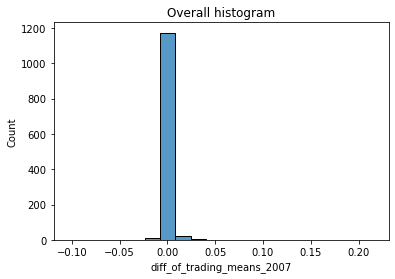

In [7]:
sns.histplot(df_combined_2007, x = 'diff_of_trading_means_2007',bins = 20).set_title("Overall histogram")

Text(0.5, 1.0, 'Unaffected BHCs (2007) histogram')

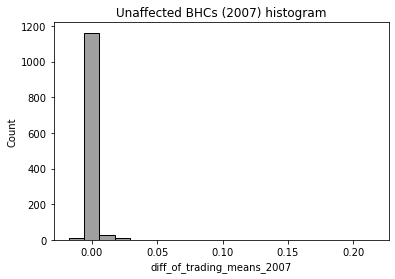

In [8]:
sns.histplot(df_combined_2007['diff_of_trading_means_2007'][df_combined_2007['affect_2007'] == 0],bins = 20,color = 'grey').set_title("Unaffected BHCs (2007) histogram")

Text(0.5, 1.0, 'Affected BHCs (2007) histogram')

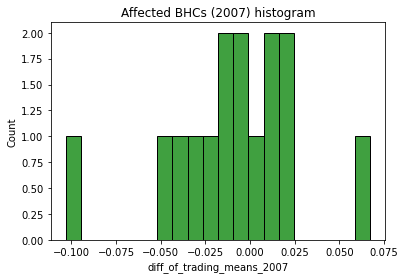

In [9]:
sns.histplot(df_combined_2007['diff_of_trading_means_2007'][df_combined_2007['affect_2007'] == 1],color = 'green',bins = 20).set_title("Affected BHCs (2007) histogram")

## TOP 10 MOST NEGATIVE - TOP 10 BIGGEST DECLINES BEFORE VS AFTER

In [10]:
pd.options.mode.chained_assignment = None 
df_combined_2007.sort_values('diff_of_trading_means_2007', inplace=True, ascending=True) 

top_10_diff_most_neg_2007 = df_combined_2007.head(10).reset_index(drop = True)
top_10_diff_most_neg_2007['legal_name'] = ['DEUTSCHE BANK*','AMARILLO NATIONAL*','JPMORGAN*','BARCLAYS GROUP US*','DORAL FINANCIAL CORP*','H BANCORP','FIRST NATIONAL OF NEBRASKA','BANK OF NEW YORK*','WACHOVIA CORP*','PNC FINANCIAL SERVICES GROUP']
top_10_diff_most_neg_2007


,rssd9001,affect_before_2007,affect_after_2007,diff_of_trading_means_2007,affect_2007,legal_name
0,1032473,0.126654,0.023479,-0.103175,1,DEUTSCHE BANK*
1,1107205,0.062361,0.010894,-0.051467,1,AMARILLO NATIONAL*
2,1039502,0.251748,0.211318,-0.040430,1,JPMORGAN*
3,2914521,0.228753,0.195892,-0.032860,1,BARCLAYS GROUP US*
4,2184164,0.032461,0.010009,-0.022453,1,DORAL FINANCIAL CORP*
5,2453084,0.017589,0.000000,-0.017589,0,H BANCORP
6,1020902,0.025593,0.010551,-0.015042,0,FIRST NATIONAL OF NEBRASKA
7,1033470,0.055840,0.042417,-0.013423,1,BANK OF NEW YORK*
8,1073551,0.062608,0.049926,-0.012682,1,WACHOVIA CORP*
9,1069778,0.029229,0.017111,-0.012118,0,PNC FINANCIAL SERVICES GROUP


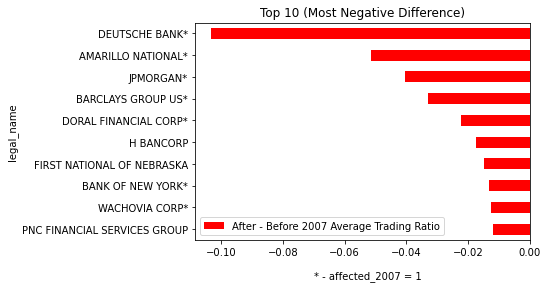

In [11]:
pd.options.mode.chained_assignment = None 
top_10_diff_most_neg_2007.sort_values('diff_of_trading_means_2007', inplace=True, ascending=False) 
top_10_diff_most_neg_2007.plot(kind='barh',x='legal_name',y='diff_of_trading_means_2007',color='red')
plt.title('Top 10 (Most Negative Difference)')
plt.legend(['After - Before 2007 Average Trading Ratio'])
plt.figtext(0.4,-0.01,"* - affected_2007 = 1")
plt.show()

As you can see, 7/10 of the top 10 most negative BHCs are affected, indicating that the top 10 banks that declined the most in trading (after-before 2007) were mostly banks that had a high average trading ratio before 2007 which is consistent with our findings from our baseline models and robustness tests. For instance, DEUTSCHE BANK TRUST CORPORATION had the biggest decline, from ~13% average trading ratio pre-2007 to ~2% average trading ratio post-2007.

## TOP 10 MOST POSITIVE - TOP 10 BIGGEST INCREASES BEFORE VS AFTER

In [12]:
df_combined_2007.sort_values('diff_of_trading_means_2007', inplace=True, ascending=False)

top_10_diff_most_pos_2007 = df_combined_2007.head(10).reset_index(drop = True)
top_10_diff_most_pos_2007['legal_name'] = ['MASSBANK CORP','PEOPLES BANCTRUST','ALLIANCE BANKSHARES','FRANKLIN RESOURCES*','FIRST MUTUAL BANCSHARES','MIDWEST INDEPENDENT BANCSHARES','SUNTRUST BANKS','COMMUNITY CENTRAL BANK CORP','BANNER CORP','SINOPAC BANCORP']
top_10_diff_most_pos_2007

,rssd9001,affect_before_2007,affect_after_2007,diff_of_trading_means_2007,affect_2007,legal_name
0,1966783,0.029460,0.244853,0.215393,0,MASSBANK CORP
1,1132298,0.000000,0.116583,0.116583,0,PEOPLES BANCTRUST
2,3123638,0.000000,0.099006,0.099006,0,ALLIANCE BANKSHARES
3,1246216,0.030680,0.097951,0.067272,1,FRANKLIN RESOURCES*
4,2833604,0.000000,0.042461,0.042461,0,FIRST MUTUAL BANCSHARES
5,1142309,0.000000,0.028089,0.028089,0,MIDWEST INDEPENDENT BANCSHARES
6,1131787,0.015359,0.043205,0.027846,0,SUNTRUST BANKS
7,2443526,0.000000,0.027302,0.027302,0,COMMUNITY CENTRAL BANK CORP
8,2126977,0.000000,0.027193,0.027193,0,BANNER CORP
9,2532402,0.000254,0.025190,0.024935,0,SINOPAC BANCORP


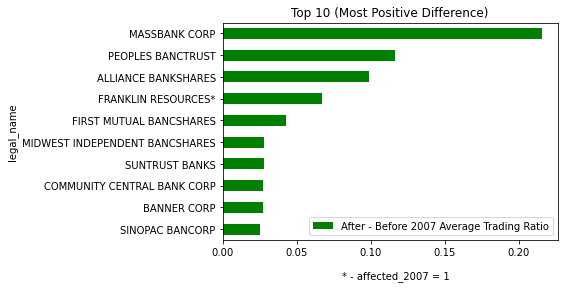

In [13]:
top_10_diff_most_pos_2007.sort_values('diff_of_trading_means_2007', inplace=True, ascending=True) 
top_10_diff_most_pos_2007.plot(kind='barh',x='legal_name',y='diff_of_trading_means_2007',color='green')
plt.title('Top 10 (Most Positive Difference)')
plt.legend(['After - Before 2007 Average Trading Ratio'])
plt.figtext(0.4,-0.01,"* - affected_2007 = 1")
plt.show()

Here we observe that from the top 10 most positive difference of the average trading ratio (after-before 2007), only one BHC is an affected 2007 BHC. This means that the banks that actually increased trading after 2007 were mostly banks that didn't trade much or at all pre-2007. This supports our findings from above and our previous findings since this plot indicates that the top trading increases predominatly consists of unaffected BHCs.


## TOP 10 MIDDLE - TOP 10 LEAST RESPONDING BHCS BEFORE VS AFTER

In [14]:
df_combined_2007.sort_values('diff_of_trading_means_2007', inplace=True, ascending=True)
df_combined_2007 = df_combined_2007.reset_index(drop = True)
df_combined_2007.dropna(inplace=True)
df_combined_2007

,rssd9001,affect_before_2007,affect_after_2007,diff_of_trading_means_2007,affect_2007
0,1032473,0.126654,0.023479,-0.103175,1
1,1107205,0.062361,0.010894,-0.051467,1
2,1039502,0.251748,0.211318,-0.040430,1
3,2914521,0.228753,0.195892,-0.032860,1
4,2184164,0.032461,0.010009,-0.022453,1
...,...,...,...,...,...
1220,2833604,0.000000,0.042461,0.042461,0
1221,1246216,0.030680,0.097951,0.067272,1
1222,3123638,0.000000,0.099006,0.099006,0
1223,1132298,0.000000,0.116583,0.116583,0


In [15]:
x=len(df_combined_2007['diff_of_trading_means_2007'])
top_10_diff_most_middle_2007 = df_combined_2007.iloc[(x//2)-4:(x//2)+6,:].reset_index(drop = True)
top_10_diff_most_middle_2007

,rssd9001,affect_before_2007,affect_after_2007,diff_of_trading_means_2007,affect_2007
0,1123915,0.0,0.0,0.0,0
1,1123885,0.0,0.0,0.0,0
2,1124659,0.0,0.0,0.0,0
3,2856014,0.0,0.0,0.0,0
4,1081079,0.0,0.0,0.0,0
5,1205950,0.0,0.0,0.0,0
6,1099917,0.0,0.0,0.0,0
7,1075881,0.0,0.0,0.0,0
8,1117464,0.0,0.0,0.0,0
9,1080595,0.0,0.0,0.0,0


It is to no surprise that the middle 10 BHCs in terms of the difference of average trading ratios are all unaffected BHCs. This is also clear from the histograms shown previously. This supports the idea that the most unresponsive banks were unaffected banks or, more specifically, BHCs that do not trade at all.

To summarize, from all plots, we can see that the biggest trading declines consisted of mainly affected BHCs and the biggest trading increases consisted of mostly unaffected BHCs. The top 10 unresponsive banks were all unaffected banks that did not trade at all which was expected.

notes: more clear - most pos, most neg, least responsive